# Итоговая работа
=====================

Поздравляю вас, теперь вы вооружены знаниями по предобработке данных, и пора применить их на интересном кейсе.

Представлены данные такси, по которым мы должны предсказать возьмёт ли таксист заказ или нет(driver_response).

Принципы вы знаете, чек-лист аналогичен лабораторной работе.

Чек-лист:
1. Загрузите датасет taxi.csv.
2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.
4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.
5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).
6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.
7. Разделите выборку на обучаемую и тестовую.
8. Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost

Если возникнут затруднения, то смотрите на материал практических занятий. Данного там должно хватить для выполнения всех пунктов. Желаю успеха!

In [32]:
import numpy as np
#from scipy.stats import t
#from scipy.stats import norm
import matplotlib.pyplot as plt
#from scipy import stats
import pandas as pd
#import io
#import requests
import seaborn as sns
#sns.set_style('darkgrid')
#from scipy.stats import pearsonr


%matplotlib inline

In [2]:
data = pd.read_csv('taxi.csv') 
data.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1


In [3]:
data.shape

(100000, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
offer_gk                  100000 non-null int64
weekday_key               100000 non-null int64
hour_key                  100000 non-null int64
driver_gk                 100000 non-null int64
order_gk                  100000 non-null int64
driver_latitude           100000 non-null float64
driver_longitude          100000 non-null float64
origin_order_latitude     100000 non-null float64
origin_order_longitude    100000 non-null float64
distance_km               100000 non-null float64
duration_min              100000 non-null float64
offer_class_group         100000 non-null object
ride_type_desc            100000 non-null object
driver_response           100000 non-null int64
dtypes: float64(6), int64(6), object(2)
memory usage: 10.7+ MB


Включение переменных в модель

'offer_gk'  - удаляем, идентификатор

'weekday_key' - оставить, перевести one hot encoder

'hour_key' - оставить, сгруппировать для уменьшения размерности, перевести one hot encoder

'driver_gk' - удаляем, идентификатор

'order_gk' - удаляем, идентификатор

'driver_latitude' - координата широты, слишком много значений, пока удалить

'driver_longitude'- координата долготы, слишком много значений, пока удалить

'origin_order_latitude' - координата широты, слишком много значений, пока удалить

'origin_order_longitude' - координата долготы, слишком много значений, пока удалить

'distance_km' - оставить в  модели. Есть отрицательные значения (-1), не удалсь понять, что они означают. Попробуем их удалить. Поскольку все остальные факторы будут переведены в one hot encoder, данный фактор также сгруппируем и преминим ohe, чтобы при построении модели он не перевешивал.

'duration_min' - профайлер показал сильную корреляцию с 'distance_km'. Удалим из модели.

'offer_class_group' - оставить, сгруппирвоать, перевести one hot encoder

'ride_type_desc' - оставить, перевести one hot encoder

'driver_response' - целевая метрика.


In [5]:
data.columns

Index(['offer_gk', 'weekday_key', 'hour_key', 'driver_gk', 'order_gk',
       'driver_latitude', 'driver_longitude', 'origin_order_latitude',
       'origin_order_longitude', 'distance_km', 'duration_min',
       'offer_class_group', 'ride_type_desc', 'driver_response'],
      dtype='object')

In [6]:
data = data.filter(items = ['weekday_key', 'hour_key', 'driver_latitude', 'driver_longitude', 'origin_order_latitude',
       'origin_order_longitude', 'distance_km', 'duration_min',
       'offer_class_group', 'ride_type_desc', 'driver_response'])
data.head()

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,5,20,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,5,14,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,6,14,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,2,6,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,4,16,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1


In [7]:
data = data[(data['distance_km']> 0)]

In [8]:
data.shape

(73641, 11)

In [9]:
data.isnull().sum().sum()

0

In [10]:
data.describe()

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,73641.000000,73641.000000,73641.000000,73641.000000,73641.000000,73641.000000,73641.000000,73641.000000,73641.000000
mean,3.150337,13.804470,55.766170,37.536511,55.771612,37.540394,25.333154,31.771583,0.471748
std,2.078147,7.314373,0.924575,0.638673,0.712029,0.498504,45.982789,35.730326,0.499205
min,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.005000,0.017000,0.000000
25%,1.000000,8.000000,55.705768,37.413468,55.705563,37.407117,7.961000,16.617000,0.000000
50%,3.000000,16.000000,55.774821,37.528320,55.775006,37.527263,18.670000,28.217000,0.000000
75%,5.000000,20.000000,55.961102,37.625587,55.962322,37.625449,38.790000,44.383000,1.000000
max,6.000000,23.000000,56.018542,38.232760,56.025061,38.204119,5234.283000,3958.283000,1.000000


In [11]:
import pandas_profiling

In [12]:
data.profile_report()

Проанализируем какие расстояния distance_km бывыют и как их сгруппировать.
В основном расстояния  до 100 км, остальное - редко встречающиеся значения. Сгруппирем  в группы по 10 км.

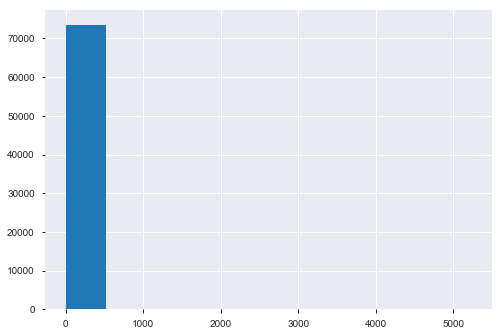

In [13]:
data['distance_km'].hist()

In [14]:
#Сгруппируем расстояние.

data['distance_km_group'] = data['distance_km']
data.loc[(data['distance_km'] <= 5) & (data['distance_km'] > 0) , 'distance_km_group'] = 0
data.loc[(data['distance_km'] <= 10) & (data['distance_km'] > 5) , 'distance_km_group'] = 1
data.loc[(data['distance_km'] <= 15) & (data['distance_km'] > 10) , 'distance_km_group'] = 2
data.loc[(data['distance_km'] <= 20) & (data['distance_km'] > 15) , 'distance_km_group'] = 3
data.loc[(data['distance_km'] <= 30) & (data['distance_km'] > 20), 'distance_km_group'] = 4
data.loc[(data['distance_km'] <= 40) & (data['distance_km'] > 30) , 'distance_km_group'] = 5
data.loc[(data['distance_km'] <= 50) & (data['distance_km'] > 40) , 'distance_km_group'] = 6
data.loc[(data['distance_km'] <= 60) & (data['distance_km'] > 50) , 'distance_km_group'] = 7
data.loc[(data['distance_km'] <= 70) & (data['distance_km'] > 60) , 'distance_km_group'] = 8
data.loc[(data['distance_km'] <= 80) & (data['distance_km'] > 70) , 'distance_km_group'] = 9
data.loc[(data['distance_km'] <= 90) & (data['distance_km'] > 80) , 'distance_km_group'] = 10
data.loc[(data['distance_km'] <= 100) & (data['distance_km'] > 90) , 'distance_km_group'] = 11
data.loc[data['distance_km'] > 100 , 'distance_km_group'] = 12

data.distance_km_group.value_counts()

1.0     11850
0.0     10952
4.0      9746
2.0      8936
6.0      8083
5.0      8078
3.0      6675
7.0      5381
8.0      2194
9.0      1057
10.0      350
12.0      175
11.0      164
Name: distance_km_group, dtype: int64

Посмотрим на динамику заказов и сгруппируем часы.


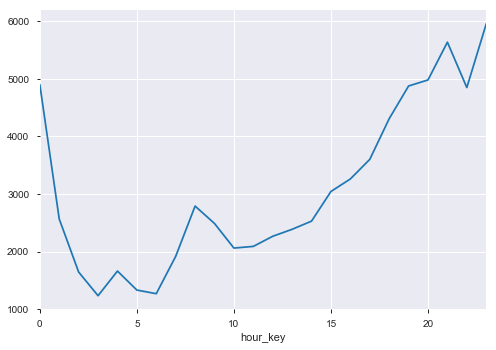

In [15]:
data_dynamics = data.groupby('hour_key')['hour_key'].count()
data_dynamics.plot()

In [16]:
data.hour_key.value_counts()

23    5953
21    5636
20    4980
0     4900
19    4875
22    4848
18    4307
17    3601
16    3261
15    3044
8     2790
1     2566
14    2529
9     2488
13    2387
12    2266
11    2090
10    2061
7     1917
4     1662
2     1645
5     1332
6     1269
3     1234
Name: hour_key, dtype: int64

In [17]:
#Сгруппируем часы

data['hour_key_group'] = data['hour_key']
data.loc[data['hour_key'] == 1, 'hour_key_group'] = 5
data.loc[data['hour_key'] == 2, 'hour_key_group'] = 7
data.loc[data['hour_key'] == 3, 'hour_key_group'] = 8
data.loc[data['hour_key'] == 4, 'hour_key_group'] = 7
data.loc[data['hour_key'] == 5, 'hour_key_group'] = 8
data.loc[data['hour_key'] == 6, 'hour_key_group'] = 8
data.loc[data['hour_key'] == 7, 'hour_key_group'] = 7
data.loc[data['hour_key'] == 8, 'hour_key_group'] = 4
data.loc[data['hour_key'] == 9, 'hour_key_group'] = 5
data.loc[data['hour_key'] == 10, 'hour_key_group'] = 6
data.loc[data['hour_key'] == 11, 'hour_key_group'] = 6
data.loc[data['hour_key'] == 12, 'hour_key_group'] = 6
data.loc[data['hour_key'] == 13, 'hour_key_group'] = 5
data.loc[data['hour_key'] == 14, 'hour_key_group'] = 4
data.loc[data['hour_key'] == 15, 'hour_key_group'] = 4
data.loc[data['hour_key'] == 16, 'hour_key_group'] = 3
data.loc[data['hour_key'] == 17, 'hour_key_group'] = 3
data.loc[data['hour_key'] == 18, 'hour_key_group'] = 3
data.loc[data['hour_key'] == 19, 'hour_key_group'] = 2
data.loc[data['hour_key'] == 20, 'hour_key_group'] = 2
data.loc[data['hour_key'] == 21, 'hour_key_group'] = 1
data.loc[data['hour_key'] == 22, 'hour_key_group'] = 1
data.loc[data['hour_key'] == 23, 'hour_key_group'] = 1
data.loc[data['hour_key'] == 0, 'hour_key_group'] = 2

data.hour_key_group.value_counts()

1    16437
2    14755
3    11169
4     8363
5     7441
6     6417
7     5224
8     3835
Name: hour_key_group, dtype: int64

Сгруппируем 'class_group'.

In [18]:
data.offer_class_group.value_counts()

Economy     40764
Standard    29857
Premium      1005
Delivery      884
Kids          568
XL            444
VIP           108
VIP+           11
Name: offer_class_group, dtype: int64

In [19]:
data['offer_class_group_group'] = data['offer_class_group']
data.loc[data['offer_class_group'] == 'VIP', 'offer_class_group_group'] = 'Premium'
data.loc[data['offer_class_group'] == 'VIP+', 'offer_class_group_group'] = 'Premium'
data.loc[data['offer_class_group'] == 'Delivery', 'offer_class_group_group'] = 'Other'
data.loc[data['offer_class_group'] == 'Kids', 'offer_class_group_group'] = 'Other'
data.loc[data['offer_class_group'] == 'XL', 'offer_class_group_group'] = 'Other'
data.loc[data['offer_class_group'] == 'Test' , 'offer_class_group_group'] = 'Other'

data.offer_class_group_group.value_counts()


Economy     40764
Standard    29857
Other        1896
Premium      1124
Name: offer_class_group_group, dtype: int64

Оставим необходимые переменные.

In [20]:
data = data.filter(items = ['weekday_key', 'hour_key_group',
       'offer_class_group_group', 'distance_km_group', 'ride_type_desc', 'driver_response'])
data.head()

,weekday_key,hour_key_group,offer_class_group_group,distance_km_group,ride_type_desc,driver_response
1,5,4,Standard,3.0,private,1
2,6,4,Economy,1.0,private,0
4,4,3,Economy,2.0,private,1
5,6,4,Economy,1.0,private,0
7,5,2,Economy,0.0,private,0


Применим One hot encoding, используя get_dummies

In [21]:
data['weekday_key'] = data['weekday_key'].astype('category')
data['distance_km_group'] = data['distance_km_group'].astype('category')
data['hour_key_group'] = data['hour_key_group'].astype('category')
data['driver_response'] = data['driver_response'].astype('category')

In [22]:
data.head()

,weekday_key,hour_key_group,offer_class_group_group,distance_km_group,ride_type_desc,driver_response
1,5,4,Standard,3.0,private,1
2,6,4,Economy,1.0,private,0
4,4,3,Economy,2.0,private,1
5,6,4,Economy,1.0,private,0
7,5,2,Economy,0.0,private,0


In [23]:
data_ohe = pd.get_dummies(data)

In [24]:
data_ohe.head()

,weekday_key_0,weekday_key_1,weekday_key_2,weekday_key_3,weekday_key_4,weekday_key_5,weekday_key_6,hour_key_group_1,hour_key_group_2,hour_key_group_3,...,distance_km_group_8.0,distance_km_group_9.0,distance_km_group_10.0,distance_km_group_11.0,distance_km_group_12.0,ride_type_desc_SMB,ride_type_desc_business,ride_type_desc_private,driver_response_0,driver_response_1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
7,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0


In [25]:
data_ohe.shape

(73641, 37)

In [26]:
input_x = data_ohe.iloc[:,:35]
output_y = data_ohe.iloc[:,35:]

output_y

,driver_response_0,driver_response_1
1,0,1
2,1,0
4,0,1
5,1,0
7,1,0
...,...,...
99995,1,0
99996,1,0
99997,1,0
99998,1,0


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_x, output_y, test_size=0.2)

In [28]:
X_train.head()

,weekday_key_0,weekday_key_1,weekday_key_2,weekday_key_3,weekday_key_4,weekday_key_5,weekday_key_6,hour_key_group_1,hour_key_group_2,hour_key_group_3,...,distance_km_group_6.0,distance_km_group_7.0,distance_km_group_8.0,distance_km_group_9.0,distance_km_group_10.0,distance_km_group_11.0,distance_km_group_12.0,ride_type_desc_SMB,ride_type_desc_business,ride_type_desc_private
92955,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
84328,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4645,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
54457,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
51819,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
from sklearn.utils import resample

N = pd.concat([X_train, y_train], axis=1)

Driver_response_1 = N[N.driver_response_1 ==1]
Driver_response_0 = N[N.driver_response_1 ==0]

print(len(Driver_response_1), len(Driver_response_0))

27777 31135


Объемы выборок не сильно отличаются. Балансировать не надо.

In [30]:
from sklearn.ensemble import RandomForestClassifier

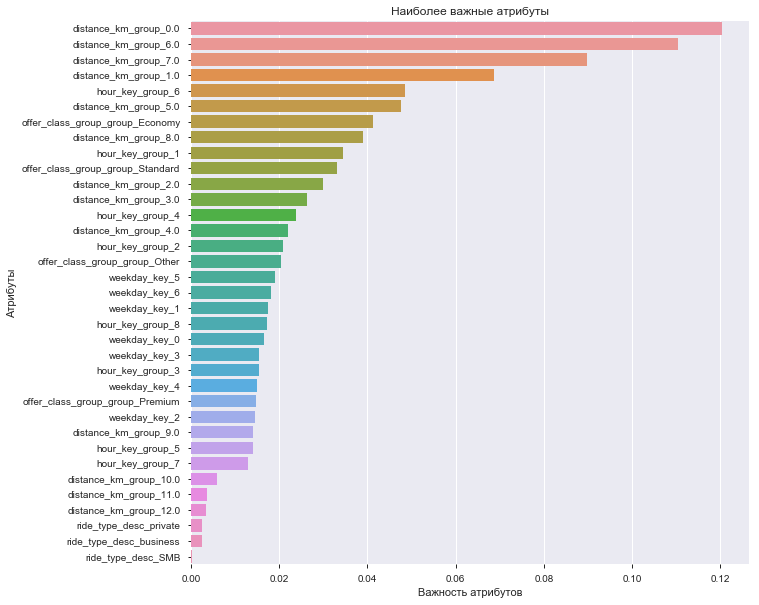

In [33]:
model = RandomForestClassifier(n_estimators=100)

model.fit(X_train,y_train)

headers = list(X_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

In [34]:
model.score(X_test, y_test)

0.6826668477153914

Модель Randome forest дала точность предсказания порядка 68%.

Построим модель XGBoost

In [35]:
data_ohe.columns

Index(['weekday_key_0', 'weekday_key_1', 'weekday_key_2', 'weekday_key_3',
       'weekday_key_4', 'weekday_key_5', 'weekday_key_6', 'hour_key_group_1',
       'hour_key_group_2', 'hour_key_group_3', 'hour_key_group_4',
       'hour_key_group_5', 'hour_key_group_6', 'hour_key_group_7',
       'hour_key_group_8', 'offer_class_group_group_Economy',
       'offer_class_group_group_Other', 'offer_class_group_group_Premium',
       'offer_class_group_group_Standard', 'distance_km_group_0.0',
       'distance_km_group_1.0', 'distance_km_group_2.0',
       'distance_km_group_3.0', 'distance_km_group_4.0',
       'distance_km_group_5.0', 'distance_km_group_6.0',
       'distance_km_group_7.0', 'distance_km_group_8.0',
       'distance_km_group_9.0', 'distance_km_group_10.0',
       'distance_km_group_11.0', 'distance_km_group_12.0',
       'ride_type_desc_SMB', 'ride_type_desc_business',
       'ride_type_desc_private', 'driver_response_0', 'driver_response_1'],
      dtype='object')

In [36]:
y_XB= data_ohe.driver_response_1
X_XB = data_ohe[['weekday_key_0', 'weekday_key_1', 'weekday_key_2', 'weekday_key_3',
       'weekday_key_4', 'weekday_key_5', 'weekday_key_6', 'hour_key_group_1',
       'hour_key_group_2', 'hour_key_group_3', 'hour_key_group_4',
       'hour_key_group_5', 'hour_key_group_6', 'hour_key_group_7',
       'hour_key_group_8', 'offer_class_group_group_Economy',
       'offer_class_group_group_Other', 'offer_class_group_group_Premium',
       'offer_class_group_group_Standard',
       'distance_km_group_0.0', 'distance_km_group_1.0',
       'distance_km_group_2.0', 'distance_km_group_3.0',
       'distance_km_group_4.0', 'distance_km_group_5.0',
       'distance_km_group_6.0', 'distance_km_group_7.0',
       'distance_km_group_8.0', 'distance_km_group_9.0',
       'distance_km_group_10.0', 'distance_km_group_11.0',
       'distance_km_group_12.0', 'ride_type_desc_SMB',
       'ride_type_desc_business',
       'ride_type_desc_private']]
X_XB

,weekday_key_0,weekday_key_1,weekday_key_2,weekday_key_3,weekday_key_4,weekday_key_5,weekday_key_6,hour_key_group_1,hour_key_group_2,hour_key_group_3,...,distance_km_group_6.0,distance_km_group_7.0,distance_km_group_8.0,distance_km_group_9.0,distance_km_group_10.0,distance_km_group_11.0,distance_km_group_12.0,ride_type_desc_SMB,ride_type_desc_business,ride_type_desc_private
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99997,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
99998,0,0,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_XB,y_XB,test_size = 0.2, random_state = 42)

In [39]:
import xgboost as xgb
from xgboost import XGBClassifier

In [40]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [41]:
model.score(X_test, y_test)

0.6920361192205853

Модель XG Boost дала чуть лучший результат - точность предсказания порядка 69%.

Попробуем построить XG Boost без one hot encoding и не исключая перамертры долготы и широты. 

In [42]:
data = pd.read_csv('taxi.csv') 

In [43]:
data = data[(data['distance_km']> 0)]

In [44]:
data['hour_key_group'] = data['hour_key']
data.loc[data['hour_key'] == 1, 'hour_key_group'] = 5
data.loc[data['hour_key'] == 2, 'hour_key_group'] = 7
data.loc[data['hour_key'] == 3, 'hour_key_group'] = 8
data.loc[data['hour_key'] == 4, 'hour_key_group'] = 7
data.loc[data['hour_key'] == 5, 'hour_key_group'] = 8
data.loc[data['hour_key'] == 6, 'hour_key_group'] = 8
data.loc[data['hour_key'] == 7, 'hour_key_group'] = 7
data.loc[data['hour_key'] == 8, 'hour_key_group'] = 4
data.loc[data['hour_key'] == 9, 'hour_key_group'] = 5
data.loc[data['hour_key'] == 10, 'hour_key_group'] = 6
data.loc[data['hour_key'] == 11, 'hour_key_group'] = 6
data.loc[data['hour_key'] == 12, 'hour_key_group'] = 6
data.loc[data['hour_key'] == 13, 'hour_key_group'] = 5
data.loc[data['hour_key'] == 14, 'hour_key_group'] = 4
data.loc[data['hour_key'] == 15, 'hour_key_group'] = 4
data.loc[data['hour_key'] == 16, 'hour_key_group'] = 3
data.loc[data['hour_key'] == 17, 'hour_key_group'] = 3
data.loc[data['hour_key'] == 18, 'hour_key_group'] = 3
data.loc[data['hour_key'] == 19, 'hour_key_group'] = 2
data.loc[data['hour_key'] == 20, 'hour_key_group'] = 2
data.loc[data['hour_key'] == 21, 'hour_key_group'] = 1
data.loc[data['hour_key'] == 22, 'hour_key_group'] = 1
data.loc[data['hour_key'] == 23, 'hour_key_group'] = 1
data.loc[data['hour_key'] == 0, 'hour_key_group'] = 2

In [45]:
data['offer_class_group_group'] = data['offer_class_group']
data.loc[data['offer_class_group'] == 'Economy', 'offer_class_group_group'] = '1'
data.loc[data['offer_class_group'] == 'Standard', 'offer_class_group_group'] = '2'
data.loc[data['offer_class_group'] == 'Premium', 'offer_class_group_group'] = '3'
data.loc[data['offer_class_group'] == 'Delivery', 'offer_class_group_group'] = '4'
data.loc[data['offer_class_group'] == 'Kids', 'offer_class_group_group'] = '5'
data.loc[data['offer_class_group'] == 'XL' , 'offer_class_group_group'] = '6'
data.loc[data['offer_class_group'] == 'VIP', 'offer_class_group_group'] = '7'
data.loc[data['offer_class_group'] == 'VIP+', 'offer_class_group_group'] = '8'
data.loc[data['offer_class_group'] == 'Test', 'offer_class_group_group'] = '9'

In [47]:
data['ride_type_desc_group'] = data['ride_type_desc']
data.loc[data['ride_type_desc'] == 'private' , 'ride_type_desc_group'] = '0'
data.loc[data['ride_type_desc'] == 'business', 'ride_type_desc_group'] = '1'
data.loc[data['ride_type_desc'] == 'affiliate', 'ride_type_desc_group'] = '2'
data.loc[data['ride_type_desc'] == 'SMB', 'ride_type_desc_group'] = '3'

In [48]:
data['distance_km_group'] = data['distance_km']
data.loc[(data['distance_km'] <= 5) & (data['distance_km'] > 0) , 'distance_km_group'] = 0
data.loc[(data['distance_km'] <= 10) & (data['distance_km'] > 5) , 'distance_km_group'] = 1
data.loc[(data['distance_km'] <= 15) & (data['distance_km'] > 10) , 'distance_km_group'] = 2
data.loc[(data['distance_km'] <= 20) & (data['distance_km'] > 15) , 'distance_km_group'] = 3
data.loc[(data['distance_km'] <= 30) & (data['distance_km'] > 20), 'distance_km_group'] = 4
data.loc[(data['distance_km'] <= 40) & (data['distance_km'] > 30) , 'distance_km_group'] = 5
data.loc[(data['distance_km'] <= 50) & (data['distance_km'] > 40) , 'distance_km_group'] = 6
data.loc[(data['distance_km'] <= 60) & (data['distance_km'] > 50) , 'distance_km_group'] = 7
data.loc[(data['distance_km'] <= 70) & (data['distance_km'] > 60) , 'distance_km_group'] = 8
data.loc[(data['distance_km'] <= 80) & (data['distance_km'] > 70) , 'distance_km_group'] = 9
data.loc[(data['distance_km'] <= 90) & (data['distance_km'] > 80) , 'distance_km_group'] = 10
data.loc[(data['distance_km'] <= 100) & (data['distance_km'] > 90) , 'distance_km_group'] = 11
data.loc[data['distance_km'] > 100 , 'distance_km_group'] = 12

In [49]:
data.columns

Index(['offer_gk', 'weekday_key', 'hour_key', 'driver_gk', 'order_gk',
       'driver_latitude', 'driver_longitude', 'origin_order_latitude',
       'origin_order_longitude', 'distance_km', 'duration_min',
       'offer_class_group', 'ride_type_desc', 'driver_response',
       'hour_key_group', 'offer_class_group_group', 'ride_type_desc_group',
       'distance_km_group'],
      dtype='object')

In [50]:
y_XB= data.driver_response
X_XB = data[['weekday_key', 'hour_key', 'driver_latitude', 'driver_longitude',
       'origin_order_latitude', 'origin_order_longitude', 'distance_km',
     'offer_class_group_group', 'ride_type_desc_group']]
X_XB

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,offer_class_group_group,ride_type_desc_group
1,5,14,55.805342,37.515023,55.819329,37.466398,18.802,2,0
2,6,14,55.813978,37.347688,55.814827,37.354074,6.747,1,0
4,4,16,55.803578,37.521602,55.812559,37.527407,12.383,1,0
5,6,15,55.818963,37.361033,55.814827,37.354074,6.747,1,0
7,5,20,55.839318,37.248862,55.839134,37.304101,1.517,1,0
...,...,...,...,...,...,...,...,...,...
99995,0,2,55.961246,37.413497,55.966694,37.415754,17.378,1,0
99996,0,1,55.961246,37.413497,55.964892,37.413543,7.751,1,0
99997,1,20,55.961315,37.413497,55.962203,37.416373,46.983,2,0
99998,6,21,55.961354,37.413864,55.964892,37.413543,50.029,1,0


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_XB,y_XB,test_size = 0.2, random_state = 42)

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
X_train

array([[ 0.89272673,  1.11894101,  0.07033843, ..., -0.16294751,
        -0.69244163, -0.04467561],
       [-1.51378172, -0.52111861,  0.03845442, ..., -0.50171857,
         0.58931295, -0.04467561],
       [-1.03248003,  0.84559774,  0.20222003, ..., -0.30583995,
         0.58931295, -0.04467561],
       ...,
       [-1.51378172,  1.25561265,  0.20199364, ...,  0.29760662,
         0.58931295, -0.04467561],
       [ 1.37402842,  0.98226938, -0.02740238, ..., -0.36267773,
        -0.69244163, -0.04467561],
       [ 0.89272673,  0.16223957,  0.11410979, ..., -0.07187087,
         0.58931295, -0.04467561]])

In [55]:
X_train = pd.DataFrame(X_train, columns=X_XB.columns)
X_test = pd.DataFrame(X_test, columns=X_XB.columns)

In [56]:
X_train

,weekday_key,hour_key,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,offer_class_group_group,ride_type_desc_group
0,0.892727,1.118941,0.070338,-0.208691,0.089713,-0.286774,-0.162948,-0.692442,-0.044676
1,-1.513782,-0.521119,0.038454,-0.023232,0.031796,-0.058029,-0.501719,0.589313,-0.044676
2,-1.032480,0.845598,0.202220,-0.187146,0.253499,-0.251430,-0.305840,0.589313,-0.044676
3,0.892727,-0.521119,0.087876,-0.190094,0.094858,-0.316646,0.020206,-0.692442,-0.044676
4,0.892727,1.118941,0.198147,-0.180067,0.253499,-0.251430,-0.110578,-0.692442,-0.044676
...,...,...,...,...,...,...,...,...,...
58907,-0.551178,0.708926,0.020774,0.215798,0.029852,0.293260,0.106899,0.589313,-0.044676
58908,0.411425,-0.931134,0.012664,0.072833,-0.005058,0.062898,-0.440689,0.589313,-0.044676
58909,-1.513782,1.255613,0.201994,-0.176904,0.253499,-0.251430,0.297607,0.589313,-0.044676
58910,1.374028,0.982269,-0.027402,-0.033839,-0.035405,-0.062484,-0.362678,-0.692442,-0.044676


In [57]:
import xgboost as xgb
from xgboost import XGBClassifier

In [58]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [59]:
model.score(X_test, y_test)

0.769298662502546

Точность предсказания выросла, 77%. Возможно, это ошибочный вариант и оценка завышена.